In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv('./IPL_Matches_2008_2022.csv')

In [3]:
data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [5]:
data.shape

(950, 20)

In [6]:
data.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [7]:
data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [8]:
data.iloc[:,[1,5,6,7,11,12]].describe()

,City,Team1,Team2,Venue,WinningTeam,WonBy
count,899,950,950,950,946,950
unique,33,18,18,49,18,4
top,Mumbai,Royal Challengers Bangalore,Mumbai Indians,Eden Gardens,Mumbai Indians,Wickets
freq,159,126,119,77,131,509


In [9]:
data.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [10]:
data.drop('method',axis=1,inplace=True)

In [11]:
data['Date']=pd.to_datetime(data.Date)

In [12]:
data.set_index('Date',inplace=True)

In [13]:
data.head()

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
Date,,,,,,,,,,,,,,,,,,
2022-05-29,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
2022-05-27,1312199,Ahmedabad,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2022-05-25,1312198,Kolkata,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
2022-05-24,1312197,Kolkata,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
2022-05-22,1304116,Mumbai,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [14]:
 #! Replacing the null values of Margin with the overall mean of Margin

data.fillna({'Method':np.round(data['Margin'].mean(),2)},inplace=True)

In [15]:
 #! Now let's replace the null values in the City

data.loc[data['City'].isnull()]

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
Date,,,,,,,,,,,,,,,,,,
2020-11-10,1237181,NaN,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
2020-11-05,1237177,NaN,2020/21,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
2020-11-03,1216495,NaN,2020/21,56,Mumbai Indians,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth
2020-11-01,1216530,NaN,2020/21,54,Kolkata Knight Riders,Rajasthan Royals,Dubai International Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,60.0,PJ Cummins,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'SP ...","['RV Uthappa', 'BA Stokes', 'SPD Smith', 'SV S...",Nitin Menon,PR Reiffel
2020-10-31,1216535,NaN,2020/21,51,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,9.0,Ishan Kishan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['Ishan Kishan', 'Q de Kock', 'SA Yadav', 'SS ...",YC Barde,PR Reiffel
2020-10-31,1216502,NaN,2020/21,52,Royal Challengers Bangalore,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,5.0,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
2020-10-29,1216536,NaN,2020/21,49,Kolkata Knight Riders,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,RD Gaikwad,"['Shubman Gill', 'N Rana', 'SP Narine', 'RK Si...","['SR Watson', 'RD Gaikwad', 'AT Rayudu', 'MS D...",C Shamshuddin,RK Illingworth
2020-10-27,1216524,NaN,2020/21,47,Sunrisers Hyderabad,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Sunrisers Hyderabad,Runs,88.0,WP Saha,"['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...","['AM Rahane', 'S Dhawan', 'MP Stoinis', 'SO He...",AK Chaudhary,Nitin Menon
2020-10-26,1216520,NaN,2020/21,46,Kolkata Knight Riders,Kings XI Punjab,Sharjah Cricket Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,8.0,CH Gayle,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'KD ...","['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N P...",KN Ananthapadmanabhan,RK Illingworth


In [16]:
 #! From the above dataframe, we observe that the Venue where the City is null is Dubai International Stadium and Sharjah Cricket Stadium. So let's replace the null values with Dubai.

data.fillna({'City':'Dubai'},inplace=True)

data.head()

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
Date,,,,,,,,,,,,,,,,,,
2022-05-29,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
2022-05-27,1312199,Ahmedabad,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2022-05-25,1312198,Kolkata,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
2022-05-24,1312197,Kolkata,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
2022-05-22,1304116,Mumbai,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [17]:
data.duplicated().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 950 entries, 2022-05-29 to 2008-04-18
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             950 non-null    object 
 2   Season           950 non-null    object 
 3   MatchNumber      950 non-null    object 
 4   Team1            950 non-null    object 
 5   Team2            950 non-null    object 
 6   Venue            950 non-null    object 
 7   TossWinner       950 non-null    object 
 8   TossDecision     950 non-null    object 
 9   SuperOver        946 non-null    object 
 10  WinningTeam      946 non-null    object 
 11  WonBy            950 non-null    object 
 12  Margin           932 non-null    float64
 13  Player_of_Match  946 non-null    object 
 14  Team1Players     950 non-null    object 
 15  Team2Players     950 non-null    object 
 16  Umpire1          950 non-null    object 
 1

In [19]:
data.Team1.value_counts()

Team1
Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [20]:
data.Team2.value_counts()

Team2
Mumbai Indians                 119
Kolkata Knight Riders          118
Rajasthan Royals               103
Royal Challengers Bangalore    100
Kings XI Punjab                 98
Chennai Super Kings             97
Sunrisers Hyderabad             83
Delhi Daredevils                76
Deccan Chargers                 36
Delhi Capitals                  34
Pune Warriors                   23
Gujarat Lions                   14
Punjab Kings                    10
Gujarat Titans                   9
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Lucknow Super Giants             7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [21]:
 # The no.of teams playing IPL since 2008 are 14. Some teams had dropped and some teams had changed their names.Delhi Daredevils, Kings XI Punjab changed their names to Delhi Capitals, Punjab Kings respectively. The teams Deccan Chargers,  Gujarat Kings, Pune Warriors, Gujarat Lions, Rising Pune Supergiants, Kochi Tuskers Kerala are dropped in the IPL. Gujarat Lions, Lucknow Super Giants recently joined IPL.

In [22]:
 #! For our convinience, we will replace Delhi Daredevils with Delhi capitals and Kings XI Punjab with Punjab Kings.

data.replace(['Delhi Daredevils','Kings XI Punjab','Rising Pune Supergiant'],['Delhi Capitals','Punjab Kings','Rising Pune Supergiants'],inplace=True)

data.Team1.value_counts()

Team1
Royal Challengers Bangalore    126
Delhi Capitals                 114
Mumbai Indians                 112
Chennai Super Kings            111
Punjab Kings                   110
Kolkata Knight Riders          105
Rajasthan Royals                89
Sunrisers Hyderabad             69
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiants         14
Lucknow Super Giants             8
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [23]:
 #! Add a column of the team which lost in the match

loss=[]
for i in range(len(data.index.date)):
    if data.iloc[i,10]==data.iloc[i,4]:
        loss.append(data.iloc[i,5])
    else:
        loss.append(data.iloc[i,4])
data['LossTeam']=loss

In [24]:
data.head(2)

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,LossTeam
Date,,,,,,,,,,,,,,,,,,,
2022-05-29,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Rajasthan Royals
2022-05-27,1312199,Ahmedabad,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,Royal Challengers Bangalore


In [25]:
plt.style.use('ggplot')

In [26]:
total_matches=(data['Team1'].value_counts().sort_index()+data['Team2'].value_counts().sort_index())

wins=data['WinningTeam'].value_counts().sort_index()    #! Stats of the winning team

loss=data['LossTeam'].value_counts().sort_values()  #! Stats of the lost team

In [27]:
match_history=pd.DataFrame({'TotalMatches':total_matches,'Wins':wins,'Loss':loss})
match_history.index.name='Teams'

match_history

,TotalMatches,Wins,Loss
Teams,,,
Chennai Super Kings,208,121,87
Deccan Chargers,75,29,46
Delhi Capitals,224,103,120
Gujarat Lions,30,13,17
Gujarat Titans,16,12,4
Kochi Tuskers Kerala,14,6,8
Kolkata Knight Riders,223,114,109
Lucknow Super Giants,15,9,6
Mumbai Indians,231,131,100


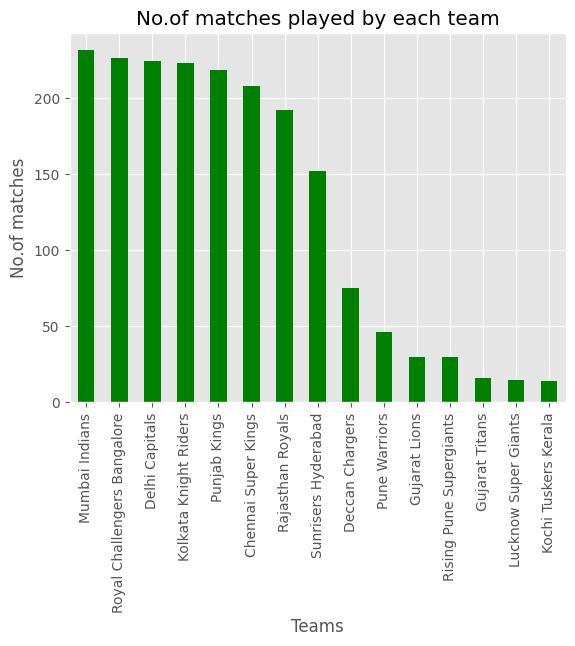

In [28]:
 #! Visualizing no.of matches played by each team

match_history['TotalMatches'].sort_values(ascending=False).plot(kind='bar',color='green')

plt.xlabel('Teams')
plt.ylabel('No.of matches')
plt.title('No.of matches played by each team');

In [29]:
 #! From the above graph, it is clear that Mumbai Indians had played most no.of matches and the Kochi Tuskers Kerala played the least.

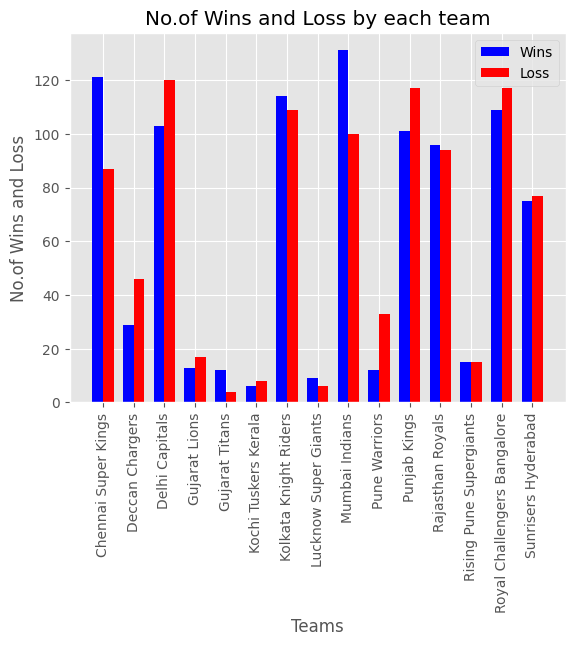

In [30]:
 #! No.of times won and lost by each team

bar_width=0.35
x=np.arange(len(match_history.index))

fig,ax=plt.subplots()

bars1=ax.bar(x-bar_width/2,match_history['Wins'].values,bar_width,label='Wins',color='blue')
bars2=ax.bar(x+bar_width/2,match_history['Loss'].values,bar_width,label='Loss',color='red')

ax.set_xlabel('Teams')
ax.set_ylabel('No.of Wins and Loss')
ax.set_title('No.of Wins and Loss by each team')
ax.set_xticks(x)
ax.set_xticklabels(match_history.index)
ax.legend()
plt.xticks(rotation=90);

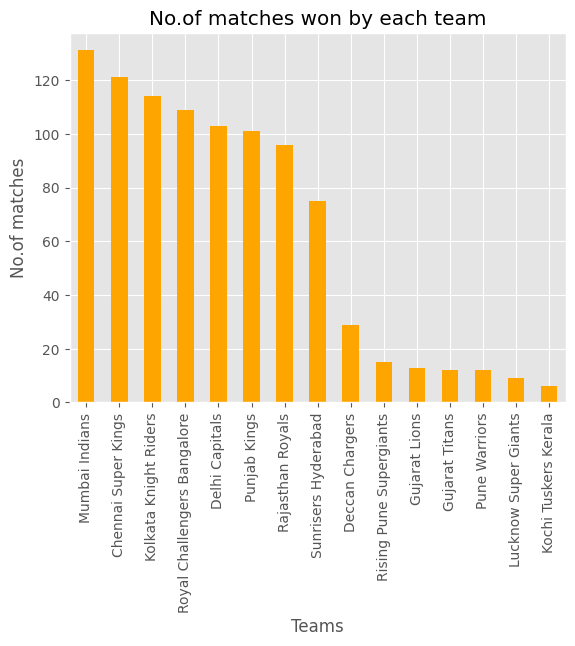

In [31]:
 #! Visualizing no.of matches won by each team

match_history['Wins'].sort_values(ascending=False).plot(kind='bar',color='orange')
plt.ylabel('No.of matches')
plt.title('No.of matches won by each team');

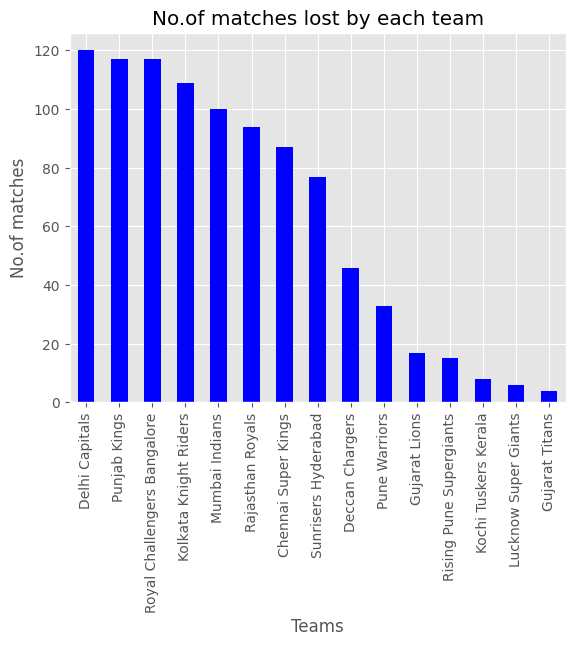

In [32]:
 #! Visualizing no.of matches lost by each team

match_history['Loss'].sort_values(ascending=False).plot(kind='bar',color='blue')
plt.ylabel('No.of matches')
plt.title('No.of matches lost by each team');

In [33]:
 #! Winning Percentage of each team?

match_history['%Win']=np.round((match_history['Wins']/match_history['TotalMatches'])*100,2)

match_history.sort_values(by='%Win',ascending=False)

,TotalMatches,Wins,Loss,%Win
Teams,,,,
Gujarat Titans,16,12,4,75.00
Lucknow Super Giants,15,9,6,60.00
Chennai Super Kings,208,121,87,58.17
Mumbai Indians,231,131,100,56.71
Kolkata Knight Riders,223,114,109,51.12
Rajasthan Royals,192,96,94,50.00
Rising Pune Supergiants,30,15,15,50.00
Sunrisers Hyderabad,152,75,77,49.34
Royal Challengers Bangalore,226,109,117,48.23


In [34]:
plt.style.use('ggplot')

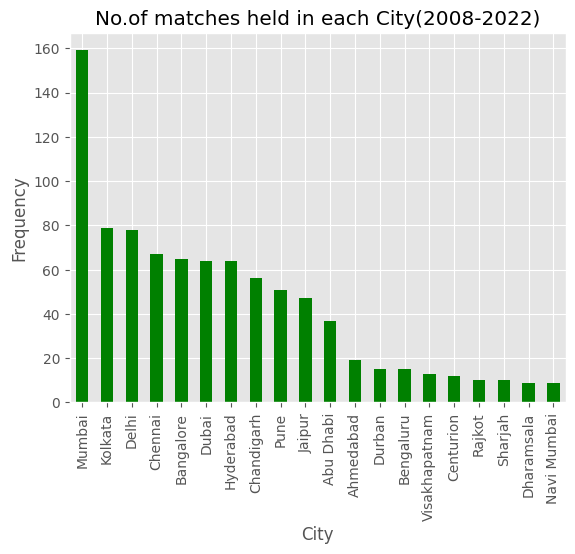

In [35]:
data.City.value_counts().nlargest(20).plot(kind='bar',color='green')
plt.title('No.of matches held in each City(2008-2022)')
plt.xlabel('City')
plt.ylabel('Frequency');

In [36]:
# From the above data, the winning percentage of Gujarat Titans and Lucknow Super Giants is high. The reason that it played less matches. If we ignore the above two teams, Chennai Super Kings and Mumbai Indians has highest winning percentage.

# Also, Pune Warriors and Deccan Chargers has the least winning percentage

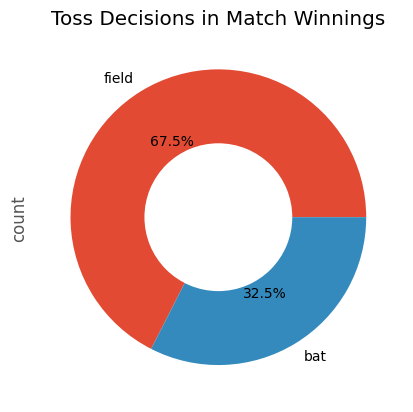

In [37]:
 #! If a team had won the toss and also won the toss, what might be the percentage of Toss decision ?

data.loc[(data['TossWinner']==data['WinningTeam']),'TossDecision'].value_counts().plot(kind='pie',autopct='%.1f%%',radius=1);
plt.pie([1],radius=0.5,colors='white')
plt.title('Toss Decisions in Match Winnings');

In [38]:
# From the above pie chart, it is concluded that a team which won the toss mostly chooses to field.

In [39]:
# If a team had won the toss and choosen to field or to bat, what is the no.of wins and winning ratio of the team?

In [40]:
toss_field=data.loc[data['TossDecision']=='field','WinningTeam'].value_counts().sort_index()

toss_field

WinningTeam
Chennai Super Kings            62
Deccan Chargers                15
Delhi Capitals                 66
Gujarat Lions                  11
Gujarat Titans                  7
Kochi Tuskers Kerala            6
Kolkata Knight Riders          72
Lucknow Super Giants            7
Mumbai Indians                 79
Pune Warriors                   3
Punjab Kings                   75
Rajasthan Royals               56
Rising Pune Supergiants        13
Royal Challengers Bangalore    74
Sunrisers Hyderabad            50
Name: count, dtype: int64

In [41]:
toss_bat=data.loc[data['TossDecision']=='bat','WinningTeam'].value_counts().sort_index()

toss_bat['Kochi Tuskers Kerala']=0
toss_bat=toss_bat.sort_index()
toss_bat

WinningTeam
Chennai Super Kings            59
Deccan Chargers                14
Delhi Capitals                 37
Gujarat Lions                   2
Gujarat Titans                  5
Kochi Tuskers Kerala            0
Kolkata Knight Riders          42
Lucknow Super Giants            2
Mumbai Indians                 52
Pune Warriors                   9
Punjab Kings                   26
Rajasthan Royals               40
Rising Pune Supergiants         2
Royal Challengers Bangalore    35
Sunrisers Hyderabad            25
Name: count, dtype: int64

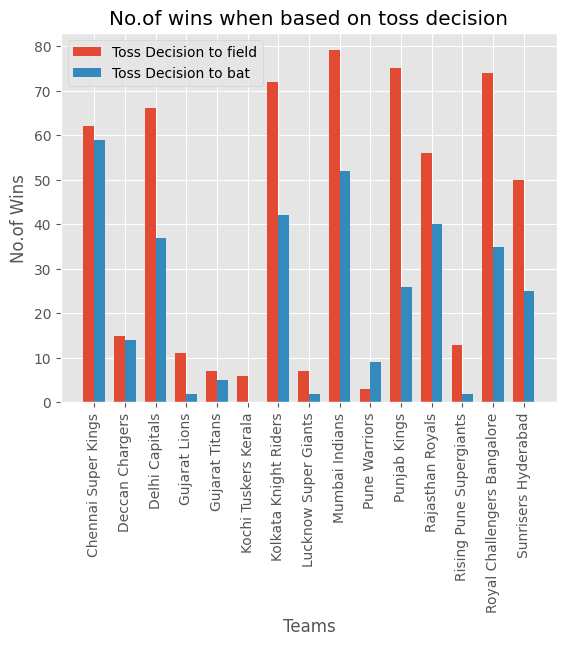

In [42]:
bar_width=0.35
x=np.arange(len(toss_bat.index))

fig,ax=plt.subplots()

bars1=ax.bar(x-bar_width/2,toss_field.values,bar_width,label='Toss Decision to field')
bars2=ax.bar(x+bar_width/2,toss_bat.values,bar_width,label='Toss Decision to bat')

ax.set_xlabel('Teams')
ax.set_ylabel('No.of Wins')
ax.set_title('No.of wins when based on toss decision')
ax.set_xticks(x)
ax.set_xticklabels(toss_bat.index)
ax.legend()
plt.xticks(rotation=90);

In [43]:
# From the above grouped bar chart, most of teams prefer to field first and their winning probability is also high when the choose to field first

In [44]:
# Let's calculate the winning percentage when each team choosen to bat or to field in toss decision.

In [45]:
match_history['%decide_to_field_and_won']=np.round(toss_field/match_history['Wins'],2)
match_history['%decide_to_bat_and_won']=np.round(toss_bat/match_history['Wins'],2)
match_history

,TotalMatches,Wins,Loss,%Win,%decide_to_field_and_won,%decide_to_bat_and_won
Teams,,,,,,
Chennai Super Kings,208,121,87,58.17,0.51,0.49
Deccan Chargers,75,29,46,38.67,0.52,0.48
Delhi Capitals,224,103,120,45.98,0.64,0.36
Gujarat Lions,30,13,17,43.33,0.85,0.15
Gujarat Titans,16,12,4,75.00,0.58,0.42
Kochi Tuskers Kerala,14,6,8,42.86,1.00,0.00
Kolkata Knight Riders,223,114,109,51.12,0.63,0.37
Lucknow Super Giants,15,9,6,60.00,0.78,0.22
Mumbai Indians,231,131,100,56.71,0.60,0.40


In [46]:
 #! Let's analyze no.of matches held in each city

In [47]:
data['City'].value_counts().sort_index()

City
Abu Dhabi          37
Ahmedabad          19
Bangalore          65
Bengaluru          15
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         56
Chennai            67
Cuttack             7
Delhi              78
Dharamsala          9
Dubai              64
Durban             15
East London         3
Hyderabad          64
Indore              9
Jaipur             47
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            79
Mumbai            159
Nagpur              3
Navi Mumbai         9
Port Elizabeth      7
Pune               51
Raipur              6
Rajkot             10
Ranchi              7
Sharjah            10
Visakhapatnam      13
Name: count, dtype: int64

In [48]:
# Replace Bengalore with Bangalore

data['City'].replace('Bengaluru','Bangalore',inplace=True)

/tmp/ipykernel_18/1667349073.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['City'].replace('Bengaluru','Bangalore',inplace=True)


In [49]:
data['City'].value_counts()

City
Mumbai            159
Bangalore          80
Kolkata            79
Delhi              78
Chennai            67
Dubai              64
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Durban             15
Visakhapatnam      13
Centurion          12
Sharjah            10
Rajkot             10
Indore              9
Navi Mumbai         9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cape Town           7
Cuttack             7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

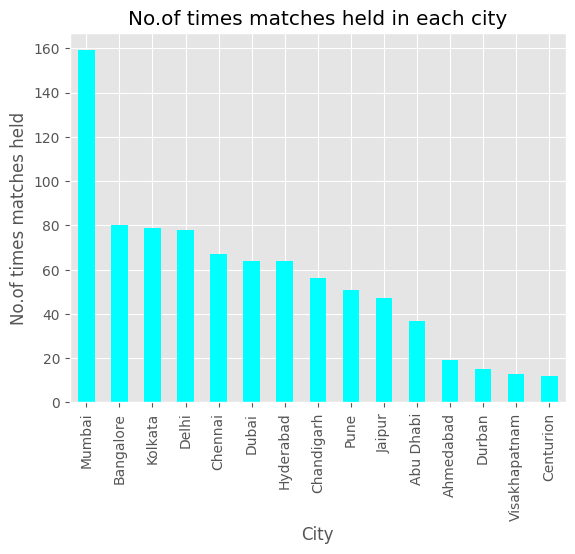

In [50]:
data['City'].value_counts().nlargest(15).plot(kind='bar',color='cyan')
plt.xlabel('City')
plt.ylabel('No.of times matches held')
plt.title('No.of times matches held in each city');

In [51]:
 #! From the above bar graph, many matches are held in Mumbai

In [52]:
teams_won_in_city = data.loc[:,['City','WinningTeam']].groupby('City').value_counts()

In [53]:
teams_won_in_city

City           WinningTeam            
Abu Dhabi      Kolkata Knight Riders      8
               Mumbai Indians             8
               Rajasthan Royals           7
               Chennai Super Kings        4
               Delhi Capitals             3
                                         ..
Visakhapatnam  Delhi Capitals             2
               Mumbai Indians             2
               Rising Pune Supergiants    2
               Punjab Kings               1
               Rajasthan Royals           1
Name: count, Length: 222, dtype: int64

In [54]:
cities = ['Ahmedabad','Bangalore','Chennai','Delhi','Dubai','Hyderabad','Jaipur','Kolkata','Mumbai','Visakhapatnam']

In [55]:
plt.rcParams['figure.max_open_warning'] = 50

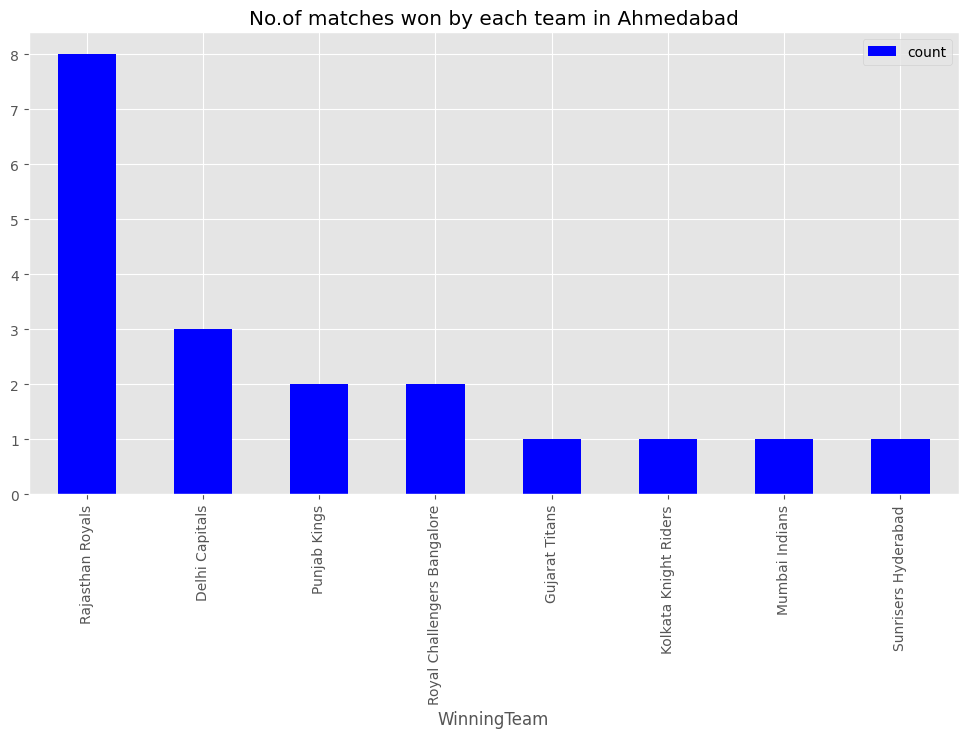

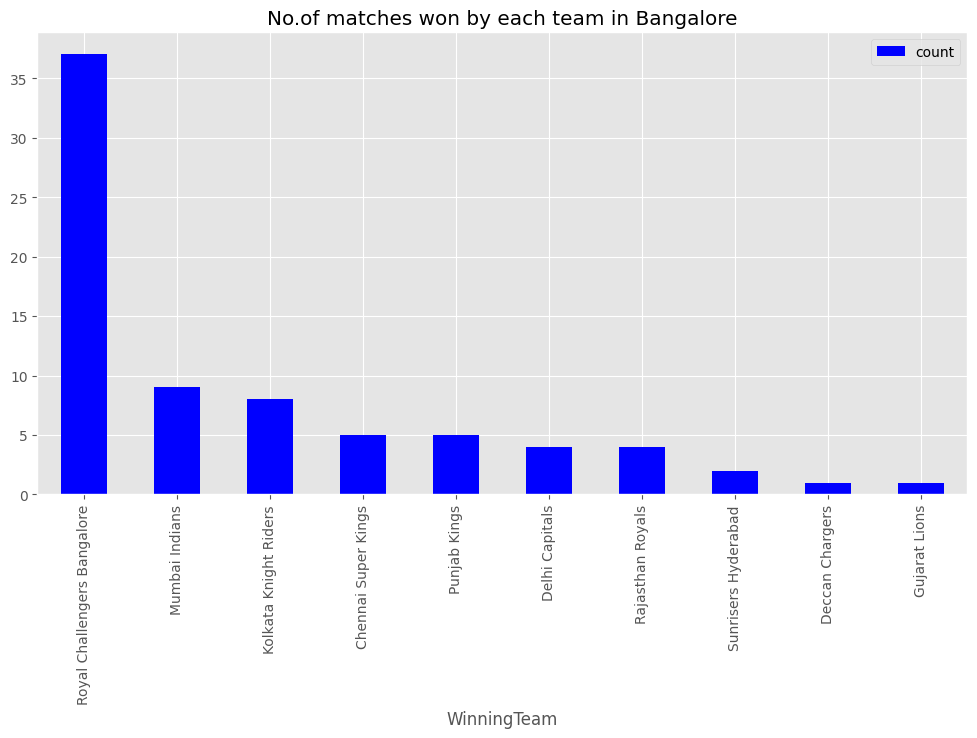

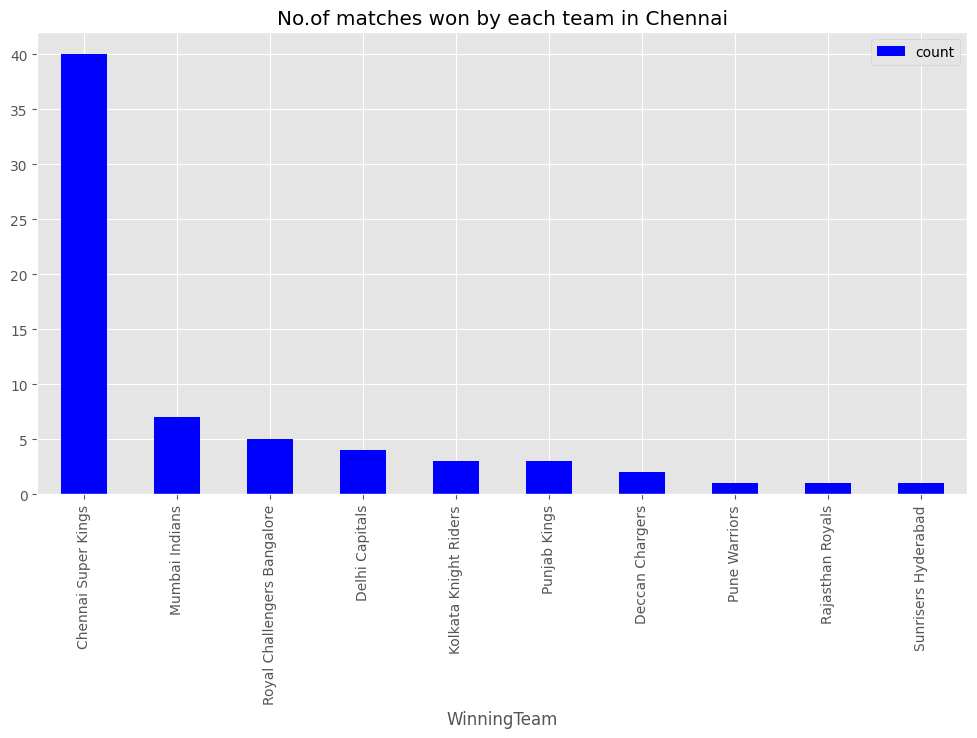

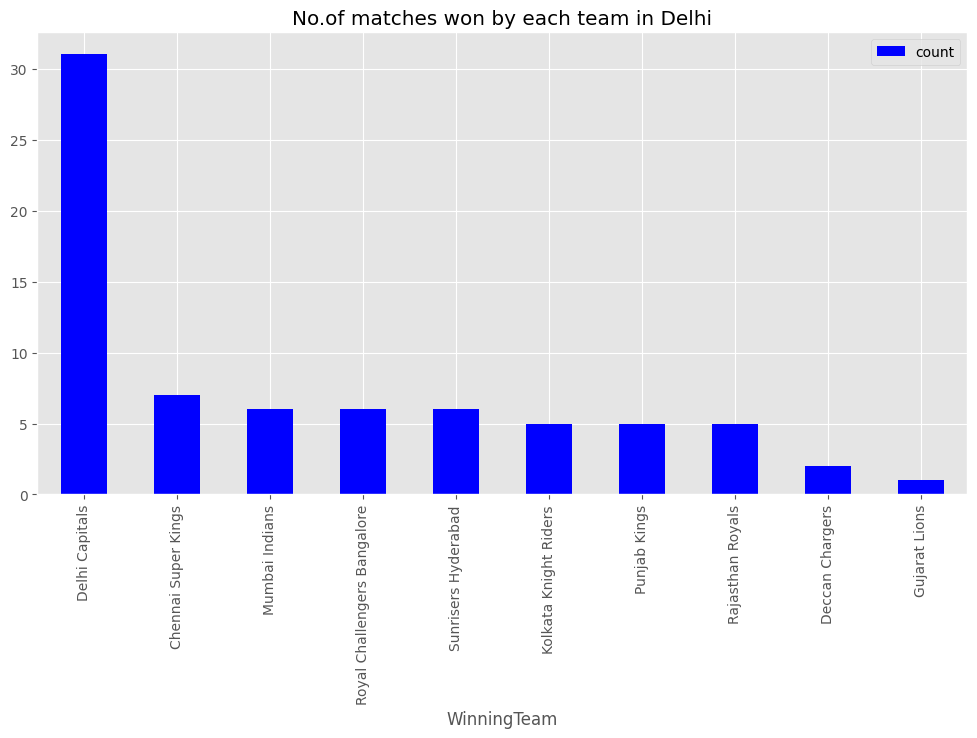

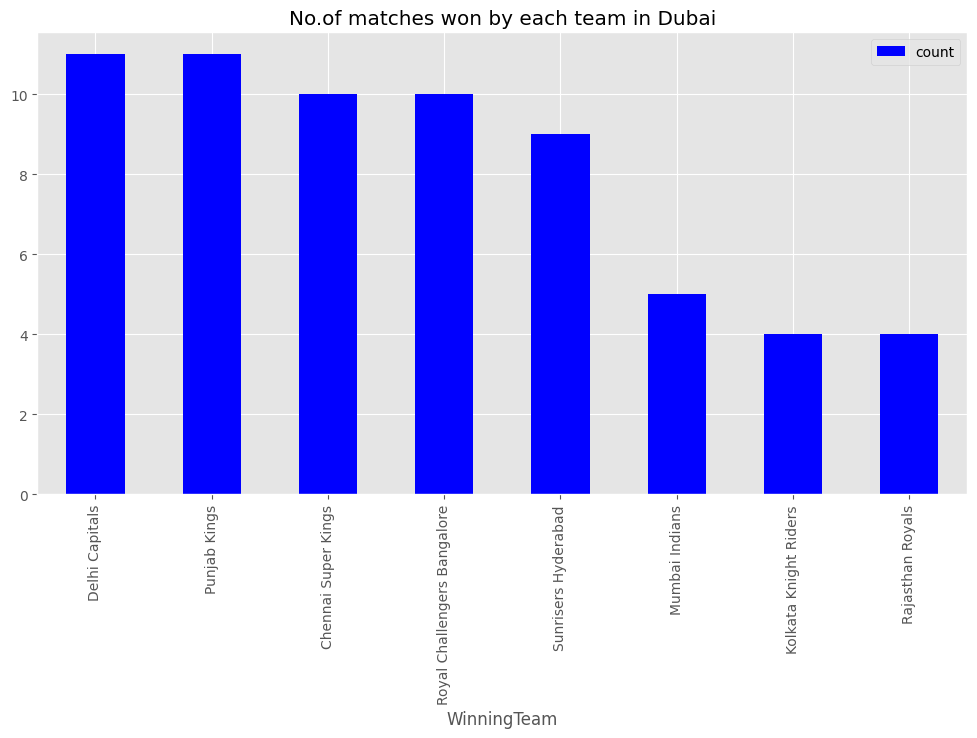

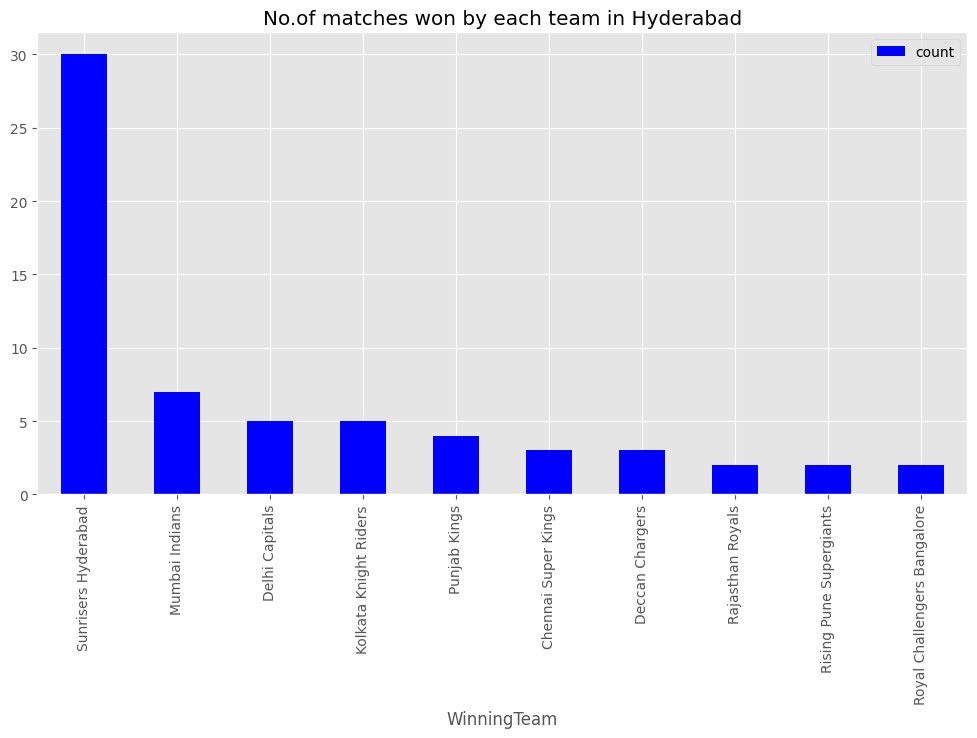

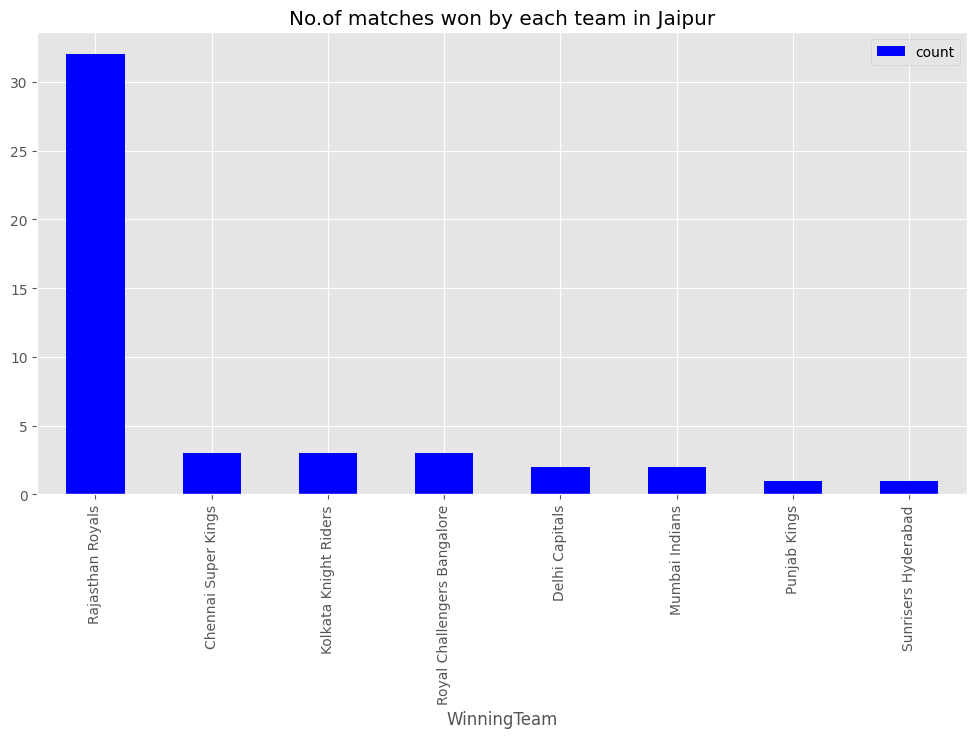

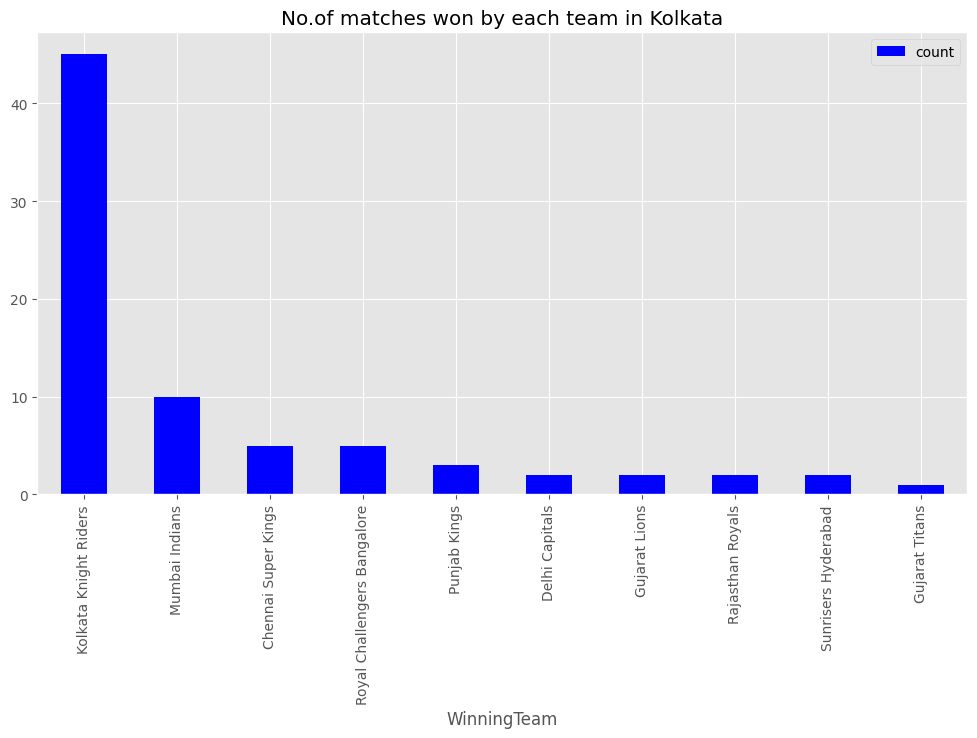

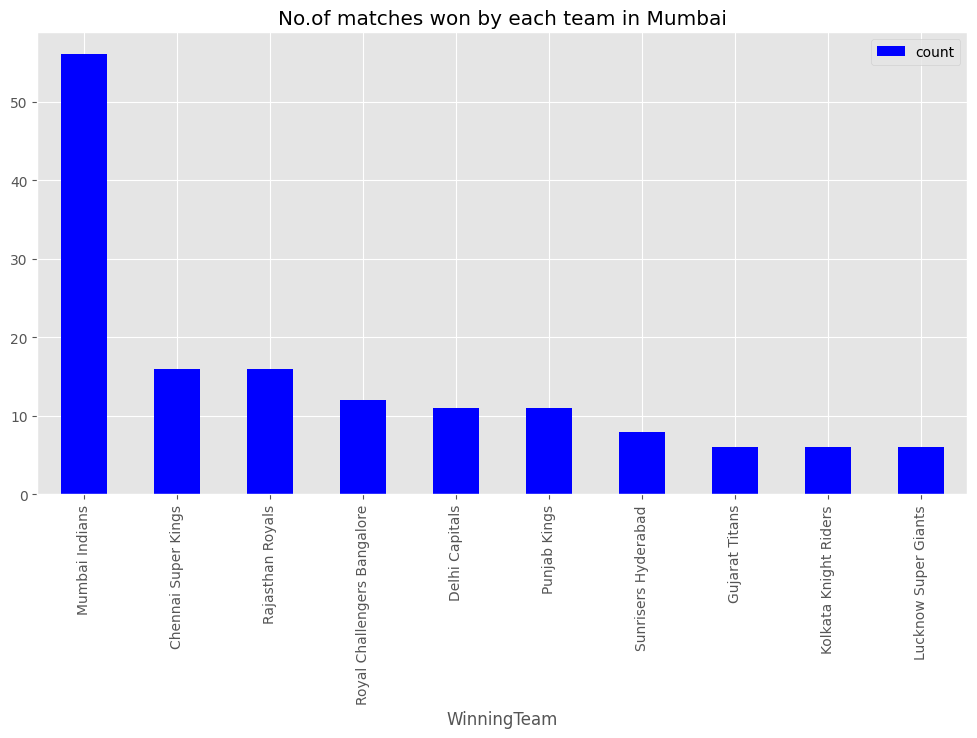

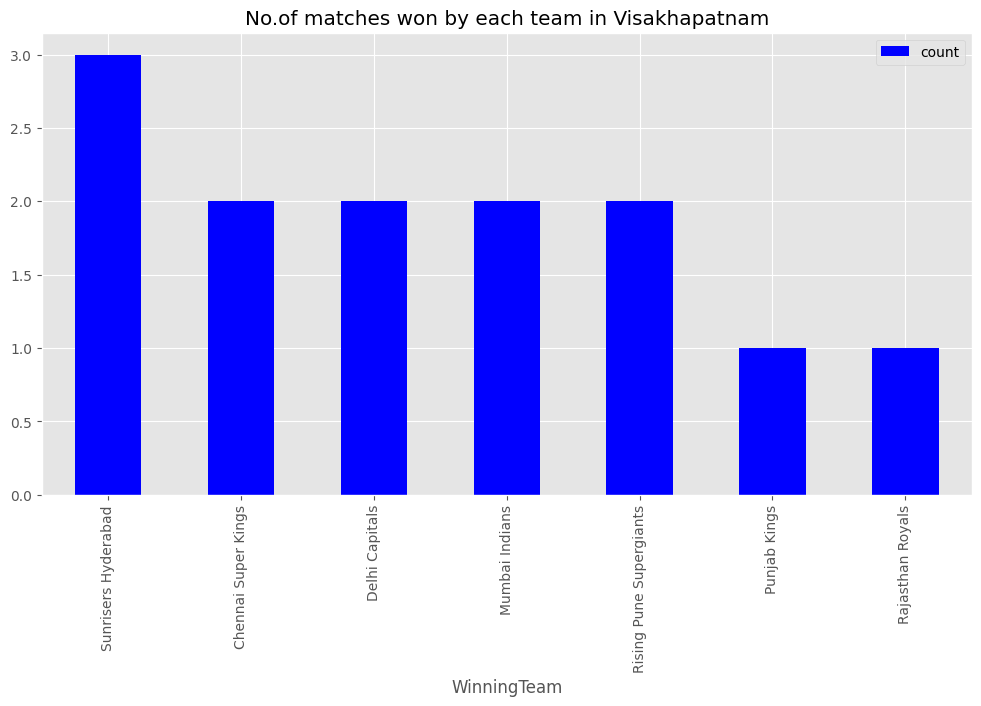

In [56]:
for i in cities:
    wins_in_each_city=pd.DataFrame(teams_won_in_city.xs(key=i,level=0).head(10))
    
    wins_in_each_city.plot(kind='bar',color='blue',figsize=(12,6))
    plt.title(f'No.of matches won by each team in {i}')

<b style='font-size:18px'>From the above bar charts, the observations are</b>
* **The winning percentage of each team is more in their home grounds.**

In [57]:
# Winning percentage in each city when toss decision is to field or to bat

In [58]:
data.head()

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,LossTeam
Date,,,,,,,,,,,,,,,,,,,
2022-05-29,1312200,Ahmedabad,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Rajasthan Royals
2022-05-27,1312199,Ahmedabad,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,Royal Challengers Bangalore
2022-05-25,1312198,Kolkata,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,Lucknow Super Giants
2022-05-24,1312197,Kolkata,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,Rajasthan Royals
2022-05-22,1304116,Mumbai,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,Sunrisers Hyderabad


In [59]:
# If a team wins, what is count of each toss decision in each city.(From here we conclude that the City is best to take toss decision)

In [60]:
wins_toss_n_match = pd.DataFrame(data.loc[(data['TossWinner']==data['WinningTeam']) & (data['TossWinner']==data['WinningTeam']),['City','TossDecision']].groupby('City').value_counts())

In [61]:
wins_toss_n_match

count
City           TossDecision       
Abu Dhabi      field            11
               bat               8
Ahmedabad      field             7
               bat               3
Bangalore      field            39
               bat               4
Bloemfontein   bat               1
               field             1
Cape Town      bat               3
               field             1
Centurion      field             5
               bat               3
Chandigarh     field            21
               bat               6
Chennai        bat              25
               field            10
Cuttack        field             3
               bat               2
Delhi          field            25
               bat              15
Dharamsala     field             4
               bat               1
Dubai          field            18
               bat               9
Durban         bat               6
               field             3
East London    bat               2
Hyderabad      field            15
               bat               6
Indore         field             7
Jaipur         field            19
               bat               6
Johannesburg   field             3
Kanpur         field             4
Kimberley      bat               1
               field             1
Kochi          bat               1
               field             1
Kolkata        field            32
               bat              12
Mumbai         field            62
               bat              22
Nagpur         bat               1
Navi Mumbai    field             3
               bat               2
Port Elizabeth bat               3
Pune           field            16
               bat              12
Raipur         field             2
               bat               1
Rajkot         field             4
Ranchi         field             3
               bat               1
Sharjah        field             6
               bat               1
Visakhapatnam  field             4
               bat               2

In [62]:
total = wins_toss_n_match.loc[(slice(None),['field','bat']),'count'].sum()

percentage_of_fielding = np.round((wins_toss_n_match.xs(key=('field'),level=1).sum()/total)*100,2)
percentage_of_batting = np.round((wins_toss_n_match.xs(key=('bat'),level=1).sum()/total)*100,2)

print(f'Percentage of winning team to choose fielding: {percentage_of_fielding}')
print(f'Percentage of winning team to choose batting: {percentage_of_batting}')

Percentage of winning team to choose fielding: count    67.48
dtype: float64
Percentage of winning team to choose batting: count    32.52
dtype: float64


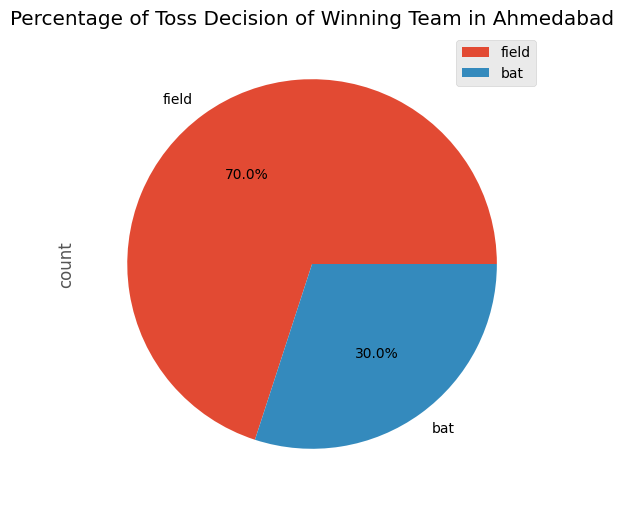

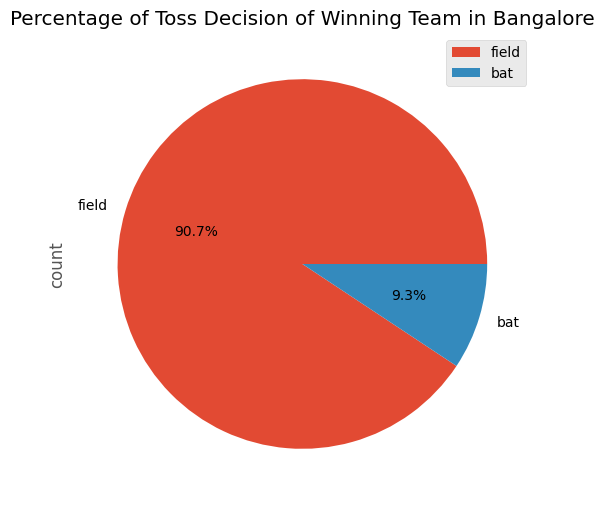

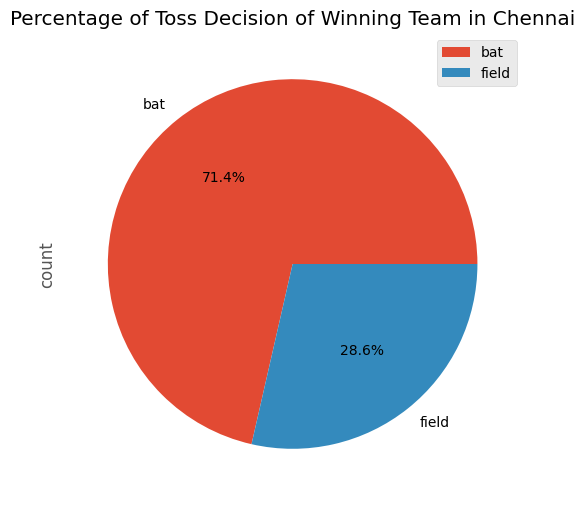

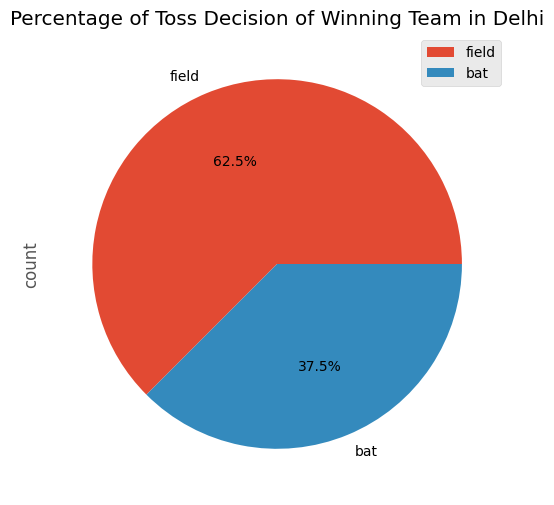

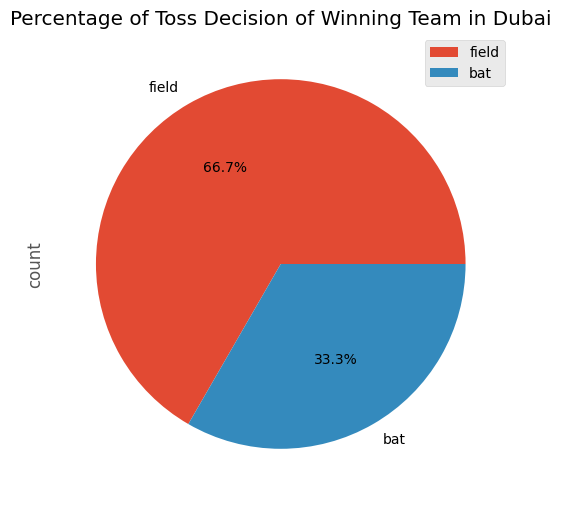

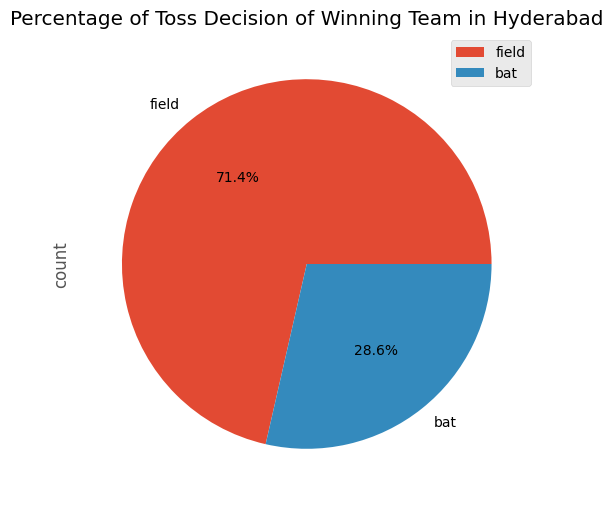

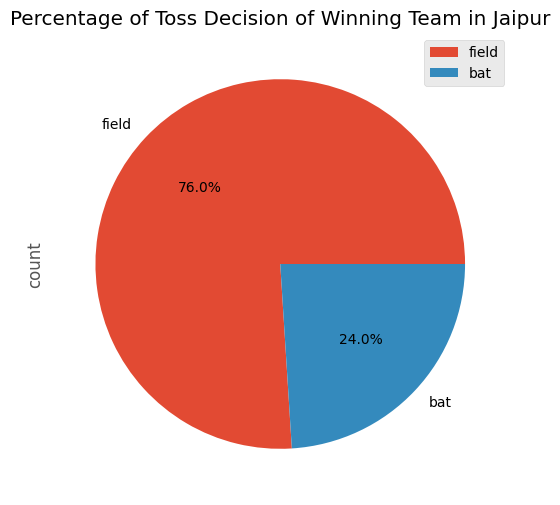

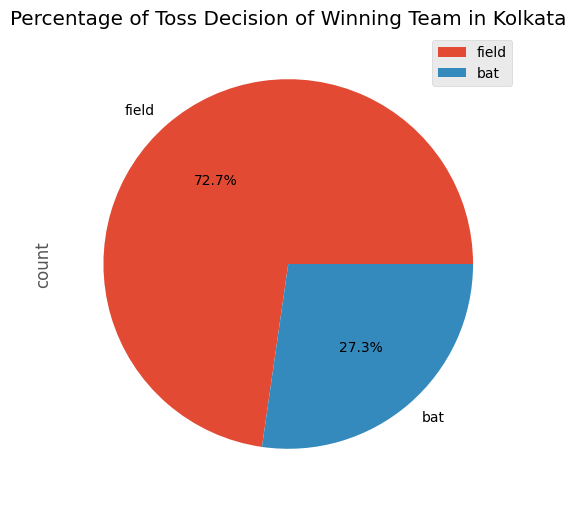

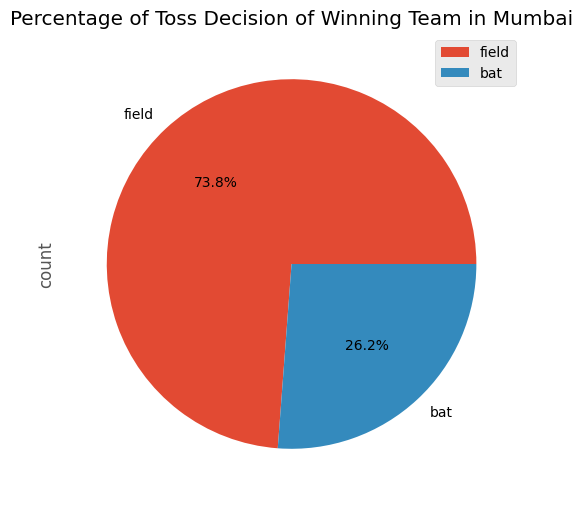

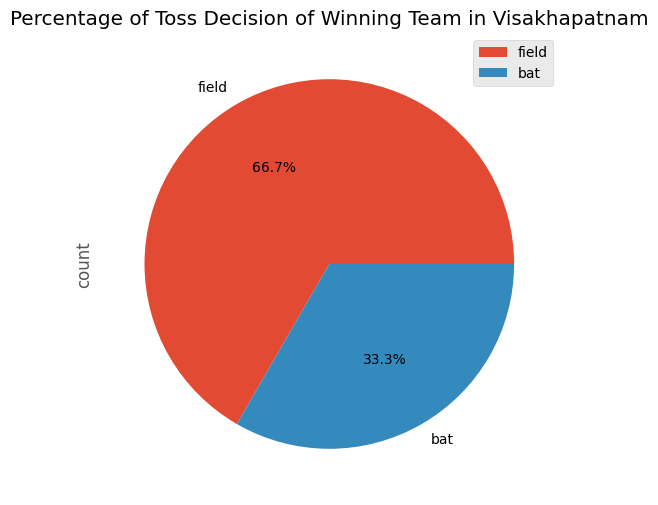

In [63]:
for i in cities:
    wins_toss_n_match.xs(key=(i),level=0).plot(kind='pie',y='count',autopct='%0.1f%%',figsize=(6,6))
    plt.title(f'Percentage of Toss Decision of Winning Team in {i}')

<b style='font-size:18px'>From the above data, the observations are </b>
* **In all the cities, toss decision of most of the winning team is to field.**
* **The overall percentage of choosing Toss Decision to field is 67.48.**
* **The overall percentage of choosing Toss Decision to field is 32.52.**